# Multivariate Linear Regression

**Model:**
$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik} + \epsilon
$$

## General Assumptions

- Features (independent variable) are linearly independent and it has a linear relationship with the dependent variable

- Features are all uncorrelated with epslon (error of model)

- For the sake of implementition, we assume the value of epsilon is zero on average (hence ignoring its effects)


**Implemented Model**

```python
y_i = beta_0 + beta_1 * x_i_1 + beta_2 * x_i_2 + ..........+ beta_k * x_i_k + epsilon

Beta = [b_0, b_1, b_2, ....... b_k]

X_i = [x_i_1, x_i_2, ........ x_i_k]

Y_i = Beta * X_i + beta_0 + epsilon   # dot product of Beta_vector and x_i
```

## Imports

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from typing import List, TypeVar, Tuple
import tqdm

Type definitions:

In [2]:
Vector = np.ndarray

## Gradient Decsent

Using Gradient Decsent to find the minimum value of the loss function

In [3]:
def descent_one_step(v: Vector, gradient: Vector, learning_rate: float) -> Vector:
    """Starts from v and moves a step units in oppsite direction of gradient"""
    assert len(v) == len(gradient), "vector and its gradient are of different lengths"
 
    step = (-learning_rate) * gradient
    return v + step

Model Prediction

In [4]:
def predict(x: Vector, beta: Vector) -> float:
    """Returns the predicted 'y' (target) value given 'x' (features) and co-efficients"""
    return x.dot(beta)

loss function (error function)

In [5]:
def error(x: Vector, y: float, beta: Vector) -> float:
    """Returns the error of predicted value from the actual value (True value)"""
    return predict(x, beta) - y


def squared_error(x: Vector, y: float, beta: Vector) -> float:
    """Returns the squared value of error"""
    return error(x, y, beta) ** 2


def squarred_error_gradient(x: Vector, y: float, beta: Vector) -> Vector:
    """Returns the gradient of error function"""
    err = error(x, y, beta)
    return [2 * err] + [2 * err * x_i for x_i in x[1:]]

## Fit Data

In [6]:
# Mini-batch stochastic

def least_squares_fit(
    xs: Vector[Vector],
    ys: Vector,
    learning_rate: float = 0.001,
    num_steps: int = 1000,
    batch_pct: int = 1,
) -> Vector:
    """Computes the parameters (Beta) that minimizes sum of squared errors using gradient descent"""

    random.seed(0)
    sample_size = len(xs)
    features_num = len(xs[0])
    batch_size = int(sample_size * batch_pct)

    # start with a random starting point for the parameters of the model (Beta)
    Beta = [random.random() for _ in range(features_num)]

    with tqdm.trange(num_steps, desc="Ordinary Least Squares Fit") as t:
        for epoch in t:
            index = random.randint(0, sample_size - 1 - batch_size) if batch_size != sample_size else 0
            batch_xs = xs[index : index + batch_size]
            batch_ys = ys[index : index + batch_size]

            err_func_grads = [
                squarred_error_gradient(x, y, Beta) for x, y in zip(batch_xs, batch_ys)
            ]
            gradient = np.mean(err_func_grads, axis=0)

            Beta = descent_one_step(Beta, gradient, learning_rate)

    return Beta

# Testing with a dataset

In [7]:
df = pd.read_csv("data\Student_Performance.csv")

In [8]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [9]:
features = df.drop(columns=["Performance Index"]).astype("float").values
print(len(features))
features

10000


array([[ 7., 99.,  1.,  9.,  1.],
       [ 4., 82.,  0.,  4.,  2.],
       [ 8., 51.,  1.,  7.,  2.],
       ...,
       [ 6., 83.,  1.,  8.,  5.],
       [ 9., 97.,  1.,  7.,  0.],
       [ 7., 74.,  0.,  8.,  1.]], shape=(10000, 5))

In [10]:
target = df["Performance Index"].values
print(len(target))
target

10000


array([91., 65., 45., ..., 74., 95., 64.], shape=(10000,))

## Scaling features for fitting the model

In [11]:
features

array([[ 7., 99.,  1.,  9.,  1.],
       [ 4., 82.,  0.,  4.,  2.],
       [ 8., 51.,  1.,  7.,  2.],
       ...,
       [ 6., 83.,  1.,  8.,  5.],
       [ 9., 97.,  1.,  7.,  0.],
       [ 7., 74.,  0.,  8.,  1.]], shape=(10000, 5))

In [12]:
target

array([91., 65., 45., ..., 74., 95., 64.], shape=(10000,))

### pre-reqs for scaling...

In [13]:
def mean(xs: List[float]) -> float:
    """Returns the mean of an array"""
    return sum(xs) / len(xs)

In [14]:
def squared_error(xs_error: List[float]) -> List[float]:
    '''Returns the squared value of each element in the list of error'''
    return [x_i**2 for x_i in xs_error]

In [15]:
def error_from_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

In [16]:
def variance(xs: List[float]) -> float:
    '''accepts a list of data points and returns its variance from mean'''
    n = len(xs)
    xs_error = error_from_mean(xs)
    xs_error_squared = squared_error(xs_error)
    return sum(xs_error_squared) / (n - 1)

In [17]:
def std_deviation(xs: List[float]) -> float:
    """accepts a list and returns its Standerd deviation from mean"""
    return math.sqrt(variance(xs))

In [18]:
def vector_sum(vectors: List[Vector]) -> Vector:
    """Returns sum of all vectors in the list of vectors"""
    num_of_elemnts = len(vectors[0])
    assert all(len(v) == num_of_elemnts for v in vectors), "vectors are of different lengths"
    # calculate sum
    sum_vector = [sum(vector[i] for vector in vectors) for i in range(num_of_elemnts)]

    return sum_vector

In [19]:
def scaler_multiply(c: float, v: Vector) -> Vector:
    # multiply each element in vector with the given scaler с
    new_vector = [c * v_i for v_i in v]
    return new_vector

In [20]:
def vectors_mean_multiple(vectors: List[Vector]) -> Vector:
    n = len(vectors)
    return scaler_multiply(1 / n, vector_sum(vectors))

### Implementation for scaling...

In [21]:
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the mean and std deviation of each position"""
    dim = len(data[0])
    means = vectors_mean_multiple(data)
    stdevs = [std_deviation([vector[i] for vector in data]) for i in range(dim)]
    return means, stdevs

In [22]:
def rescale(data: List[Vector]) -> List[Vector]:
    """rescale the input data so that each position has a mean of 0 and std dev=1"""
    dim = len(data[0])
    means, stdevs = scale(data)
    rescaled = [v[:] for v in data]  # make a copy of each vector
    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]
    return rescaled

### Scaling features

In [23]:
features

array([[ 7., 99.,  1.,  9.,  1.],
       [ 4., 82.,  0.,  4.,  2.],
       [ 8., 51.,  1.,  7.,  2.],
       ...,
       [ 6., 83.,  1.,  8.,  5.],
       [ 9., 97.,  1.,  7.,  0.],
       [ 7., 74.,  0.,  8.,  1.]], shape=(10000, 5))

In [24]:
# Scaling features
scaled_features = rescale(features.copy())
print((len(scaled_features), len(scaled_features[0])))
scaled_features[:10]

(10000, 5)


[array([ 0.77514895,  1.70409044,  1.01040412,  1.45613179, -1.24969145]),
 array([-0.38346141,  0.72387648, -0.98960404, -1.49221962, -0.9009371 ]),
 array([ 1.16135241, -1.06357251,  1.01040412,  0.27679123, -0.9009371 ]),
 array([ 0.00274204, -1.00591287,  1.01040412, -0.90254933, -0.9009371 ]),
 array([ 0.77514895,  0.32025897, -0.98960404,  0.86646151,  0.14532594]),
 array([-0.76966486,  0.4932379 , -0.98960404,  1.45613179,  0.49408028]),
 array([ 0.77514895,  0.20493968,  1.01040412, -0.90254933,  0.49408028]),
 array([ 1.16135241, -1.40953038,  1.01040412, -1.49221962,  0.49408028]),
 array([ 0.00274204,  0.43557826, -0.98960404,  0.86646151, -0.9009371 ]),
 array([-0.38346141,  1.12749399, -0.98960404, -1.49221962, -1.5984458 ])]

## Training: *Multiple linear Regression model*

### Adding Ones to feature_matrix (design matrix) for beta zero

In [25]:
x_features = np.array(features)
print(x_features.shape)
x_features

(10000, 5)


array([[ 7., 99.,  1.,  9.,  1.],
       [ 4., 82.,  0.,  4.,  2.],
       [ 8., 51.,  1.,  7.,  2.],
       ...,
       [ 6., 83.,  1.,  8.,  5.],
       [ 9., 97.,  1.,  7.,  0.],
       [ 7., 74.,  0.,  8.,  1.]], shape=(10000, 5))

In [26]:
ones = np.ones((len(x_features), 1), dtype=float)
print(ones.shape)

(10000, 1)


In [27]:
X_features = np.concatenate([ones, x_features], axis=1)
print(X_features.shape)
print(X_features)

(10000, 6)
[[ 1.  7. 99.  1.  9.  1.]
 [ 1.  4. 82.  0.  4.  2.]
 [ 1.  8. 51.  1.  7.  2.]
 ...
 [ 1.  6. 83.  1.  8.  5.]
 [ 1.  9. 97.  1.  7.  0.]
 [ 1.  7. 74.  0.  8.  1.]]


### Train-test Split

Train test split

In [28]:
X = TypeVar("X")
Y = TypeVar("Y")

In [29]:
def split_data(data: List[X], prob: float) -> Tuple[List[X], List[X]]:
    """Split the given data into fractions of prob given [[prob, 1-prob]]"""  # prob is fractio of training data set
    data = data[:]
    random.shuffle(data)
    cut = int(len(data) * prob)
    return data[:cut], data[cut:]

In [30]:
def train_test_split(
    xs: List[X], ys: List[Y], test_pct: float
) -> Tuple[List[X], List[X], List[Y], List[Y]]:
    """Split them by using indeices"""

    idxs = [i for i in range(len(xs))]
    train_idxs, test_idxs = split_data(idxs, 1 - test_pct)

    return (
        [xs[i] for i in train_idxs],
        [xs[i] for i in test_idxs],
        [ys[i] for i in train_idxs],
        [ys[i] for i in test_idxs],
    )  # x train, x test, y train, y test

In [31]:
# x_train, x_test, y_train, y_test = train_test_split(scaled_features, target, test_pct=0.2)
x_train, x_test, y_train, y_test = train_test_split(X_features, target, test_pct=0.2)

In [32]:
x_train
print(len(x_train))
print(x_train)

8000
[array([ 1.,  9., 99.,  0.,  5.,  6.]), array([ 1.,  8., 52.,  0.,  4.,  3.]), array([ 1.,  5., 88.,  1.,  8.,  5.]), array([ 1.,  9., 85.,  0.,  7.,  9.]), array([ 1.,  4., 90.,  0.,  8.,  3.]), array([ 1.,  6., 88.,  1.,  8.,  3.]), array([ 1.,  4., 95.,  1.,  7.,  2.]), array([ 1.,  6., 75.,  1.,  6.,  6.]), array([ 1.,  4., 82.,  1.,  8.,  8.]), array([ 1.,  6., 75.,  1.,  4.,  3.]), array([ 1.,  2., 47.,  1.,  6.,  3.]), array([ 1.,  8., 45.,  1.,  6.,  8.]), array([ 1.,  3., 90.,  1.,  5.,  6.]), array([ 1.,  3., 80.,  0.,  6.,  1.]), array([ 1.,  6., 62.,  1.,  8.,  5.]), array([ 1.,  1., 96.,  1.,  6.,  7.]), array([ 1.,  6., 46.,  0.,  6.,  2.]), array([ 1.,  6., 98.,  0.,  8.,  0.]), array([ 1.,  9., 57.,  1.,  7.,  5.]), array([ 1.,  3., 83.,  1.,  7.,  5.]), array([ 1.,  6., 51.,  1.,  7.,  0.]), array([ 1.,  1., 89.,  1.,  6.,  0.]), array([ 1.,  6., 77.,  0.,  8.,  2.]), array([ 1.,  7., 86.,  0.,  6.,  0.]), array([ 1.,  1., 49.,  0.,  9.,  3.]), array([ 1.,  1., 48

In [33]:
x_test
print(len(x_test))
print(x_test)

2000
[array([ 1.,  3., 56.,  1.,  8.,  7.]), array([ 1.,  6., 66.,  1.,  8.,  8.]), array([ 1.,  4., 44.,  0.,  4.,  0.]), array([ 1.,  3., 56.,  0.,  6.,  3.]), array([ 1.,  1., 93.,  1.,  7.,  8.]), array([ 1.,  3., 97.,  1.,  7.,  1.]), array([ 1.,  4., 51.,  1.,  7.,  4.]), array([ 1.,  2., 96.,  1.,  7.,  8.]), array([ 1.,  3., 71.,  1.,  4.,  1.]), array([ 1.,  3., 78.,  0.,  4.,  2.]), array([ 1.,  9., 68.,  0.,  6.,  4.]), array([ 1.,  3., 97.,  1.,  6.,  1.]), array([ 1.,  7., 77.,  0.,  9.,  8.]), array([ 1.,  1., 67.,  1.,  8.,  0.]), array([ 1.,  5., 46.,  1.,  7.,  8.]), array([ 1.,  1., 68.,  0.,  7.,  8.]), array([ 1.,  9., 47.,  1.,  4.,  2.]), array([ 1.,  2., 97.,  0.,  5.,  9.]), array([ 1.,  2., 71.,  1.,  4.,  2.]), array([ 1.,  7., 85.,  0.,  5.,  2.]), array([ 1.,  4., 79.,  0.,  9.,  0.]), array([ 1.,  5., 82.,  1.,  7.,  4.]), array([ 1.,  1., 72.,  1.,  8.,  9.]), array([ 1.,  8., 40.,  1.,  7.,  7.]), array([ 1.,  7., 40.,  0.,  6.,  1.]), array([ 1.,  4., 42

In [34]:
y_train
print(len(y_train))
print(y_train)

8000
[np.float64(97.0), np.float64(41.0), np.float64(76.0), np.float64(88.0), np.float64(69.0), np.float64(78.0), np.float64(77.0), np.float64(63.0), np.float64(68.0), np.float64(63.0), np.float64(30.0), np.float64(40.0), np.float64(70.0), np.float64(61.0), np.float64(49.0), np.float64(69.0), np.float64(27.0), np.float64(85.0), np.float64(55.0), np.float64(61.0), np.float64(37.0), np.float64(63.0), np.float64(62.0), np.float64(77.0), np.float64(24.0), np.float64(19.0), np.float64(51.0), np.float64(95.0), np.float64(42.0), np.float64(58.0), np.float64(54.0), np.float64(49.0), np.float64(81.0), np.float64(65.0), np.float64(74.0), np.float64(27.0), np.float64(57.0), np.float64(88.0), np.float64(22.0), np.float64(56.0), np.float64(29.0), np.float64(33.0), np.float64(48.0), np.float64(36.0), np.float64(84.0), np.float64(50.0), np.float64(65.0), np.float64(45.0), np.float64(63.0), np.float64(57.0), np.float64(23.0), np.float64(76.0), np.float64(46.0), np.float64(26.0), np.float64(82.0), np.f

In [35]:
y_test
print(y_test)
print(len(y_test))

[np.float64(38.0), np.float64(56.0), np.float64(25.0), np.float64(35.0), np.float64(68.0), np.float64(74.0), np.float64(32.0), np.float64(77.0), np.float64(48.0), np.float64(57.0), np.float64(65.0), np.float64(75.0), np.float64(70.0), np.float64(38.0), np.float64(36.0), np.float64(46.0), np.float64(44.0), np.float64(73.0), np.float64(48.0), np.float64(75.0), np.float64(62.0), np.float64(68.0), np.float64(49.0), np.float64(31.0), np.float64(29.0), np.float64(22.0), np.float64(55.0), np.float64(46.0), np.float64(71.0), np.float64(48.0), np.float64(46.0), np.float64(30.0), np.float64(54.0), np.float64(41.0), np.float64(99.0), np.float64(78.0), np.float64(58.0), np.float64(40.0), np.float64(50.0), np.float64(64.0), np.float64(76.0), np.float64(95.0), np.float64(75.0), np.float64(48.0), np.float64(57.0), np.float64(80.0), np.float64(68.0), np.float64(23.0), np.float64(47.0), np.float64(53.0), np.float64(58.0), np.float64(60.0), np.float64(64.0), np.float64(29.0), np.float64(47.0), np.float6

### Fitting model into data: (*Muti-linear regression*)

In [36]:
# Fit the Multiple linear Regression model
beta = least_squares_fit(xs=x_train, ys=y_train, learning_rate=0.0001, num_steps=1000)
beta

Ordinary Least Squares Fit: 100%|██████████| 1000/1000 [00:38<00:00, 26.25it/s]


array([ 0.59890812,  1.63394632,  0.76805835,  0.15927425, -0.70005387,
       -0.27617896])

In [37]:
# # Fit the Multiple linear Regression model
# beta = least_squares_fit(xs=x_train, ys=y_train, learning_rate=0.00000001, num_steps=1000)
# beta

## Testing: *Multiple linear Regression model*

#### Testing on training data

In [38]:
Beta = np.array(beta).reshape(-1, 1)
print(Beta.shape)
Beta

(6, 1)


array([[ 0.59890812],
       [ 1.63394632],
       [ 0.76805835],
       [ 0.15927425],
       [-0.70005387],
       [-0.27617896]])

In [39]:
x_train
print(len(x_train))
print(x_train)

8000
[array([ 1.,  9., 99.,  0.,  5.,  6.]), array([ 1.,  8., 52.,  0.,  4.,  3.]), array([ 1.,  5., 88.,  1.,  8.,  5.]), array([ 1.,  9., 85.,  0.,  7.,  9.]), array([ 1.,  4., 90.,  0.,  8.,  3.]), array([ 1.,  6., 88.,  1.,  8.,  3.]), array([ 1.,  4., 95.,  1.,  7.,  2.]), array([ 1.,  6., 75.,  1.,  6.,  6.]), array([ 1.,  4., 82.,  1.,  8.,  8.]), array([ 1.,  6., 75.,  1.,  4.,  3.]), array([ 1.,  2., 47.,  1.,  6.,  3.]), array([ 1.,  8., 45.,  1.,  6.,  8.]), array([ 1.,  3., 90.,  1.,  5.,  6.]), array([ 1.,  3., 80.,  0.,  6.,  1.]), array([ 1.,  6., 62.,  1.,  8.,  5.]), array([ 1.,  1., 96.,  1.,  6.,  7.]), array([ 1.,  6., 46.,  0.,  6.,  2.]), array([ 1.,  6., 98.,  0.,  8.,  0.]), array([ 1.,  9., 57.,  1.,  7.,  5.]), array([ 1.,  3., 83.,  1.,  7.,  5.]), array([ 1.,  6., 51.,  1.,  7.,  0.]), array([ 1.,  1., 89.,  1.,  6.,  0.]), array([ 1.,  6., 77.,  0.,  8.,  2.]), array([ 1.,  7., 86.,  0.,  6.,  0.]), array([ 1.,  1., 49.,  0.,  9.,  3.]), array([ 1.,  1., 48

In [40]:
train_pred = (x_train @ Beta).squeeze()
train_pred[:10]

array([86.18485854, 49.98076053, 69.53572299, 73.203397  , 69.83097704,
       71.72202724, 74.80677588, 62.30883954, 62.46488967, 64.53748418])

In [41]:
y_train[:10]

[np.float64(97.0),
 np.float64(41.0),
 np.float64(76.0),
 np.float64(88.0),
 np.float64(69.0),
 np.float64(78.0),
 np.float64(77.0),
 np.float64(63.0),
 np.float64(68.0),
 np.float64(63.0)]

#### Testing on testing data

In [42]:
beta

array([ 0.59890812,  1.63394632,  0.76805835,  0.15927425, -0.70005387,
       -0.27617896])

In [43]:
Beta = np.array(beta).reshape(-1, 1)
print(Beta.shape)
Beta

(6, 1)


array([[ 0.59890812],
       [ 1.63394632],
       [ 0.76805835],
       [ 0.15927425],
       [-0.70005387],
       [-0.27617896]])

In [44]:
test_pred = (x_test @ Beta).squeeze()

In [45]:
test_pred[:10]

array([41.13760521, 53.44384871, 38.12904533, 43.48315456, 66.71174642,
       74.98512522, 40.45985055, 70.64986779, 57.11576974, 62.05672497])

In [46]:
y_test[:10]

[np.float64(38.0),
 np.float64(56.0),
 np.float64(25.0),
 np.float64(35.0),
 np.float64(68.0),
 np.float64(74.0),
 np.float64(32.0),
 np.float64(77.0),
 np.float64(48.0),
 np.float64(57.0)]

## Score for the model

R square value:

In [47]:
def r_square(ys, y_pred):
    err = np.array(y_pred) - np.array(ys)
    ss_fit = (err**2).sum()
    ss_mean = sum(squared_error(error_from_mean(y_test)))

    return (ss_mean - ss_fit) / ss_mean

In [48]:
r_square(y_train, train_pred)

np.float64(0.5527671885509539)

In [49]:
r_square(y_test, test_pred)

np.float64(0.8911805192704031)

## Plotting the error from the model

In [50]:
model_error = pd.Series(np.array(test_pred) - np.array(y_test))

In [51]:
model_error.describe()

count    2000.000000
mean        1.195438
std         6.152790
min       -17.888741
25%        -3.083266
50%         1.186786
75%         5.440691
max        18.325036
dtype: float64

<Axes: ylabel='Density'>

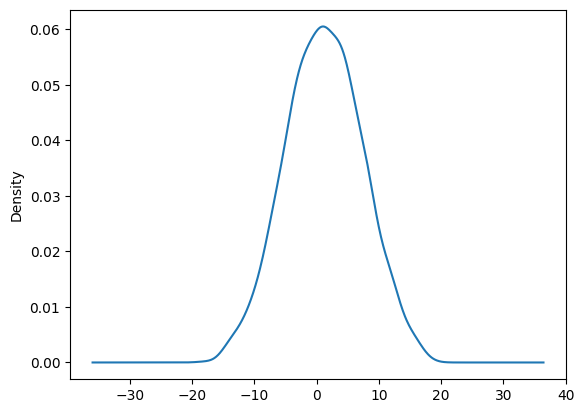

In [52]:
model_error.plot(kind='kde')